Built a machine learning model to classify iris flowers into three species using numerical features.


IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In seaborn iris dataset is there by default,so we loaded the dataset

In [3]:
dfiris=sns.load_dataset(r"iris")

In [4]:
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The dataset contains 150 clean and well-structured records suitable for classification tasks.


Finding Missing values

In [5]:
dfiris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Initial data inspection confirms no missing values and consistent feature types.


In [7]:
dfiris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#ERROR DETECTION

<Axes: >

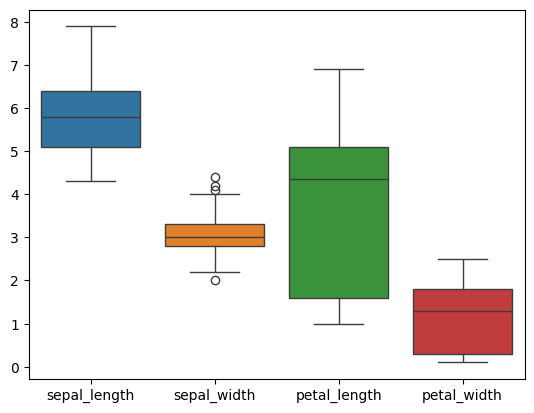

In [28]:
sns.boxplot(dfiris)

there are errors found in sepalwidth column,so we have to remove them

In [29]:
dfiris["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

<Axes: ylabel='sepal_width'>

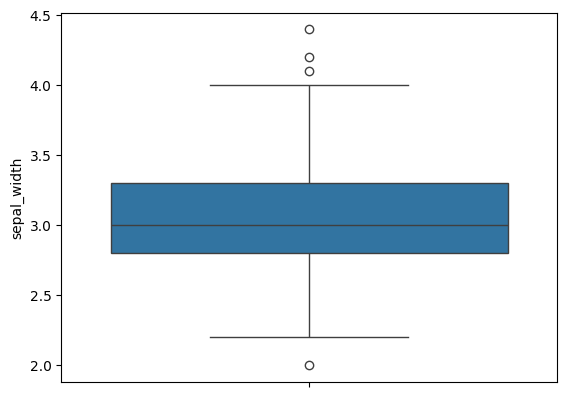

In [30]:
sns.boxplot(dfiris["sepal_width"])

In [31]:
q1=dfiris["sepal_width"].quantile(0.25)

In [32]:
q1

np.float64(2.8)

In [33]:
q3=dfiris["sepal_width"].quantile(0.75)

In [34]:
q3

np.float64(3.3)

In [36]:
iqr=q3-q1

In [37]:
lower=q3-(1.5*iqr)

In [38]:
upper=q3+(1.5*iqr)

In [39]:
lower

np.float64(2.55)

In [40]:
upper

np.float64(4.05)

In [51]:
dfiris["sepal_width"]<lower

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146     True
147    False
148    False
149    False
Name: sepal_width, Length: 150, dtype: bool

In [52]:
dfiris[dfiris["sepal_width"]<lower]

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
53,5.5,2.3,4.0,1.3,versicolor
57,4.9,2.4,3.3,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
69,5.6,2.5,3.9,1.1,versicolor
72,6.3,2.5,4.9,1.5,versicolor
80,5.5,2.4,3.8,1.1,versicolor
81,5.5,2.4,3.7,1.0,versicolor


In [53]:
dfiris["sepal_width"]>upper

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_width, Length: 150, dtype: bool

In [54]:
dfiris[dfiris["sepal_width"]>upper]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [55]:
dfiris[(dfiris["sepal_width"]<lower)  |  (dfiris["sepal_width"]>upper)]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
53,5.5,2.3,4.0,1.3,versicolor
57,4.9,2.4,3.3,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor
62,6.0,2.2,4.0,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor
69,5.6,2.5,3.9,1.1,versicolor


In [56]:
dfiris["sepal_width"].map(lambda x: lower if x<lower else upper if x>upper else x)

0      3.50
1      3.00
2      3.20
3      3.10
4      3.60
       ... 
145    3.00
146    2.55
147    3.00
148    3.40
149    3.00
Name: sepal_width, Length: 150, dtype: float64

In [57]:
dfiris["sepal_width"]=dfiris["sepal_width"].map(lambda x: lower if x<lower else upper if x>upper else x)

In [58]:
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.00,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.10,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.55,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


<Axes: >

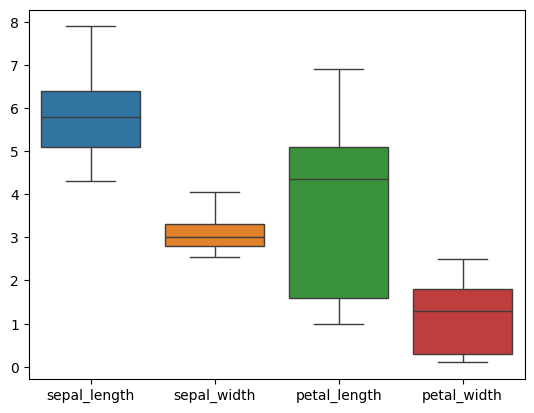

In [59]:
sns.boxplot(dfiris)

In [60]:
dfiris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.00,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.10,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.55,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


#dependent col is categorical so use label encoder  ,machine understands numbers only not words so convert to numbers

In [62]:
dfiris["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label=LabelEncoder()

In [68]:
label

LabelEncoder()

In [69]:
label.fit(dfiris["species"])

LabelEncoder()

In [70]:
label.transform(dfiris["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
ary=label.transform(dfiris["species"])

In [72]:
ary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

DATA SEPERATION

In [73]:
X=dfiris.drop("species",axis=1)

In [74]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.50,1.4,0.2
1,4.9,3.00,1.4,0.2
2,4.7,3.20,1.3,0.2
3,4.6,3.10,1.5,0.2
4,5.0,3.60,1.4,0.2
...,...,...,...,...
145,6.7,3.00,5.2,2.3
146,6.3,2.55,5.0,1.9
147,6.5,3.00,5.2,2.0
148,6.2,3.40,5.4,2.3


In [75]:
y=dfiris["species"]

In [76]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

IMBALANCE

In [77]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

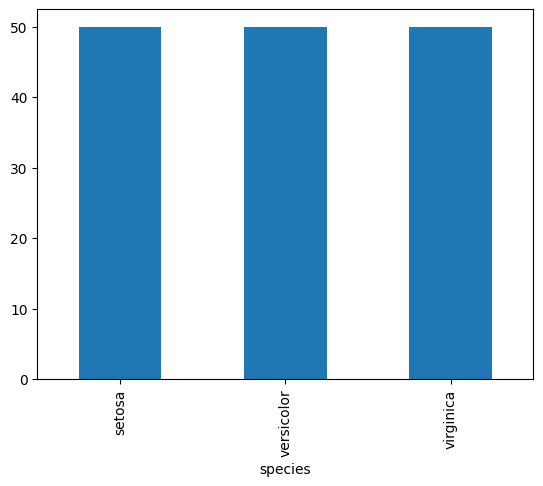

In [78]:
y.value_counts().plot(kind="bar")

data splitting

The data was split into training and testing sets to evaluate performance on unseen samples.


In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [82]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
137,6.4,3.1,5.5,1.8
46,5.1,3.8,1.6,0.2
78,6.0,2.9,4.5,1.5
...,...,...,...,...
110,6.5,3.2,5.1,2.0
70,5.9,3.2,4.8,1.8
142,5.8,2.7,5.1,1.9
22,4.6,3.6,1.0,0.2


In [83]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.60,6.1,2.5
103,6.3,2.90,5.6,1.8
121,5.6,2.80,4.9,2.0
89,5.5,2.55,4.0,1.3
83,6.0,2.70,5.1,1.6
66,5.6,3.00,4.5,1.5
42,4.4,3.20,1.3,0.2
73,6.1,2.80,4.7,1.2
9,4.9,3.10,1.5,0.1
1,4.9,3.00,1.4,0.2


MODEL BUILDING

Built a Decision Tree–based machine learning model to classify iris flowers into three species.


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_model=DecisionTreeClassifier()

In [87]:
dt_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [88]:
dt_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [89]:
dt_model.score(X_test,y_test)

0.9333333333333333